In [1]:
import numpy as np
from sympy import *
import matplotlib.pyplot as plt
from matplotlib import *
from matplotlib.colors import ListedColormap
from mpl_toolkits.mplot3d import Axes3D
from IPython.display import display, Image
init_printing()
%matplotlib inline 

Training epoch:  1
Training epoch:  2
No updates after epoch:  2
Final weights:  [-0.09621598 -0.35209177 -0.10734388]


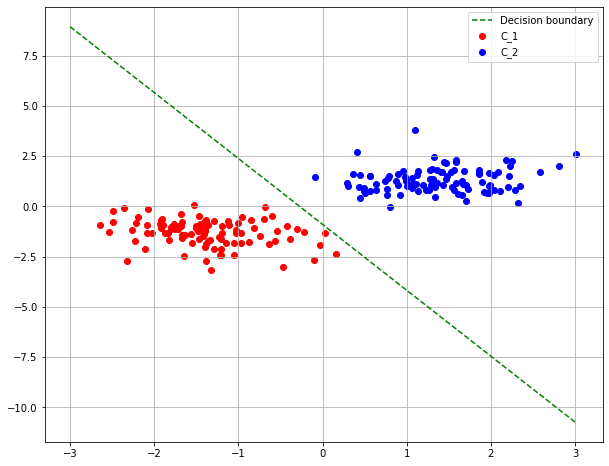

In [2]:
def generate_random_data():
    '''
        Generate two random data sets.
        :param: None
        :returns: 
            c_1, c_2, c_aug: data sets
            c_aug: combined data set
    '''
    mu, sigma = 0, 0.1
    c_1 = np.array([np.random.normal(mu-1.35, sigma+0.5, 100), 
                    np.random.normal(mu-1.35, sigma+0.5, 100)]).reshape(100, 2)
    c_2 = np.array([np.random.normal(mu+1.35, sigma+0.5, 100),
                    np.random.normal(mu+1.35, sigma+0.5, 100)]).reshape(100, 2)
    
    bias_c_1 = np.ones(shape=(c_1.shape[0], 1))
    bias_c_2 = np.ones(shape=(c_2.shape[0], 1))
    
    c_1_aug = np.hstack((bias_c_1, c_1))
    c_2_aug = -np.hstack((bias_c_2, c_2))
    
    c_aug = np.vstack((c_1_aug, c_2_aug))
    
    return c_1, c_2, c_aug

def learn_perceptron(c_data, l_rate=1, epochs=10):
    '''
        Learn the weights of perceptron.
        :param: 
            c_data: data points
            l_rate: learning rate
            epochs: number of epochs
        :returns: w: weights
    '''
    w = np.array([1, np.random.random(), np.random.random()])
    
    for epoch in range(epochs):
        update = False
        print ("Training epoch: ", epoch+1)
        
        for input_vector in c_data:
            if input_vector.dot(w) <= 0:
                w = w + l_rate*input_vector.dot(w)
                update = True
                
        if not update:
            print ("No updates after epoch: ", epoch+1)
            print ("Final weights: ", w)
            break
    
    return w
    
def evaluate_perceptron(c_1, c_2, c_data, w):
    '''
        Plot the data points and decision boundary.
        :param: 
            c_1, c_2: original data points
            c_data: augmented data points
            w: weights
        :returns: None
    '''
    %matplotlib inline 
    
    plt.figure(figsize=(10, 8))
    x = np.arange(-3, 4)
    m = -w[1]/w[2]
    c = -w[0]/w[2]
    y = m*x + c
    
    plt.scatter(c_1[:,0], c_1[:,1], c='red', label='C_1')
    plt.scatter(c_2[:,0], c_2[:,1], c='blue', label='C_2')
    plt.plot(x, y, '--g', label='Decision boundary')
    
    plt.grid()
    plt.legend()
    plt.show()
    
c_1, c_2, c_data = generate_random_data()
w = learn_perceptron(c_data, l_rate=0.85, epochs=100)
evaluate_perceptron(c_1, c_2, c_data, w)